## Packages importing

In [1]:
%reset

Nothing done.


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import string
import re
import spacy
import gensim
from gensim import corpora
import pyLDAvis
import pyLDAvis.gensim
from sklearn.metrics.pairwise import cosine_similarity
import squarify
import nltk
from collections import defaultdict
import numpy as np
from sklearn.svm import SVC
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

## Data importing: basic characteristics

In [3]:
column_names = ["sentiment", "text"]
df = pd.read_csv("all-data.csv", names=column_names,  encoding='latin-1')
print(df.head())
print(df.shape)
le = LabelEncoder()
df['sentiment'] = le.fit_transform(df['sentiment'])

  sentiment                                               text
0   neutral  According to Gran , the company has no plans t...
1   neutral  Technopolis plans to develop in stages an area...
2  negative  The international electronic industry company ...
3  positive  With the new production plant the company woul...
4  positive  According to the company 's updated strategy f...
(4846, 2)


In [4]:
print(df.head())

   sentiment                                               text
0          1  According to Gran , the company has no plans t...
1          1  Technopolis plans to develop in stages an area...
2          0  The international electronic industry company ...
3          2  With the new production plant the company woul...
4          2  According to the company 's updated strategy f...


## Quick EDA


### Target variable distribution

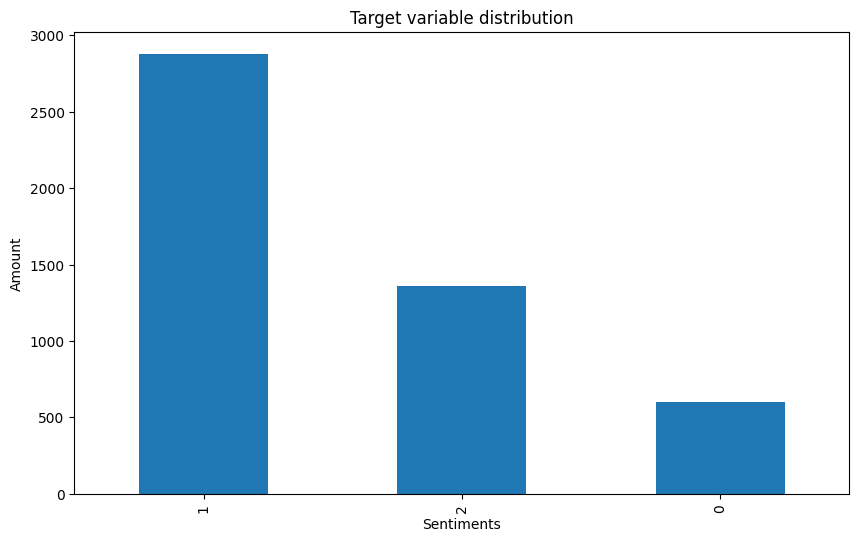

In [5]:
plt.figure(figsize=(10, 6))
df['sentiment'].value_counts().plot(kind='bar')
plt.xlabel('Sentiments')
plt.ylabel('Amount')
plt.title('Target variable distribution')
plt.show()

### Negative sentiment

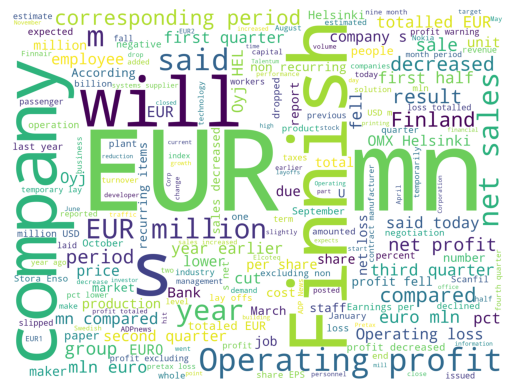

In [6]:
df_neg = df[df['sentiment']==0]
words = ' '.join(df_neg['text'].astype(str))
word = ' '.join([word for word in words.split() if not word.startswith('@')])

wordcloud = WordCloud(background_color='white',stopwords=STOPWORDS,
                      width=2000, height=1500).generate(''.join(word))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### Neutral sentiment

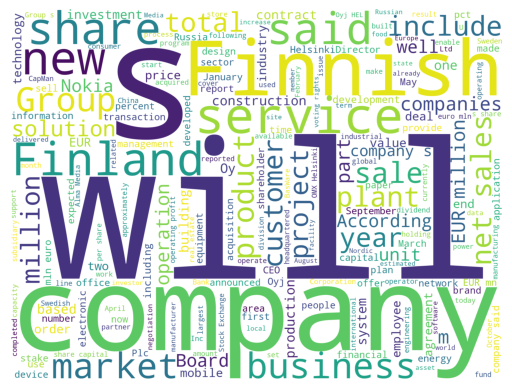

In [7]:
df_pos = df[df['sentiment']==1]
words = ' '.join(df_pos['text'].astype(str))
word = ' '.join([word for word in words.split() if not word.startswith('@')])

wordcloud = WordCloud(background_color='white',stopwords=STOPWORDS,
                      width=2000, height=1500).generate(''.join(word))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### Positive sentiment

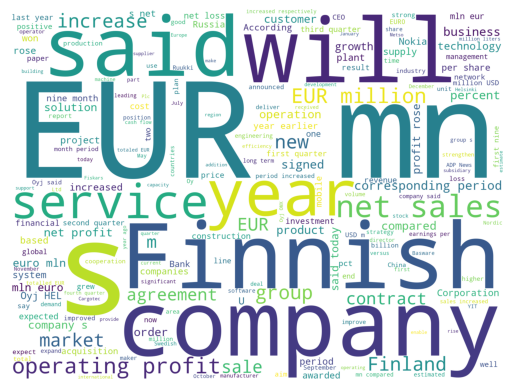

In [8]:
df_pos = df[df['sentiment']==2]
words = ' '.join(df_pos['text'].astype(str))
word = ' '.join([word for word in words.split() if not word.startswith('@')])

wordcloud = WordCloud(background_color='white',stopwords=STOPWORDS,
                      width=2000, height=1500).generate(''.join(word))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## Basic preprocessing

In [9]:
def preprocess(text):
    stop_words = set(stopwords.words('english'))
    text = text.lower()
    text = ''.join([word for word in text if word not in string.punctuation])
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return tokens


## Data set splitting process + first model perfomance/evaluation: Multinomial LogReg

In [10]:
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['sentiment'], test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(analyzer=preprocess)

X_train = vectorizer.fit_transform(X_train)

X_test = vectorizer.transform(X_test)

model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=5000)

model.fit(X_train, y_train)

predictions = model.predict(X_test)

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.77      0.42      0.54       110
           1       0.73      0.95      0.83       571
           2       0.77      0.45      0.56       289

    accuracy                           0.74       970
   macro avg       0.75      0.60      0.64       970
weighted avg       0.75      0.74      0.72       970



## Second model perfomance/evaluation: Support Vector Machine

In [11]:
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)
print(classification_report(y_test, svm_predictions))

              precision    recall  f1-score   support

           0       0.74      0.35      0.48       110
           1       0.71      0.97      0.82       571
           2       0.79      0.37      0.51       289

    accuracy                           0.72       970
   macro avg       0.75      0.57      0.60       970
weighted avg       0.74      0.72      0.69       970



## Topic modelling

In [12]:
nlp = spacy.load('en_core_web_md', disable=['parser', 'ner'])

df['text'] = df['text'].apply(preprocess)

text_list = df['text'].tolist()

dictionary = corpora.Dictionary(text_list)

doc_term_matrix = [dictionary.doc2bow(post) for post in text_list]

LDA = gensim.models.ldamodel.LdaModel

lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=10, random_state=20, chunksize=1000,
                passes=50, iterations=100)

lda_model.print_topics()




[(0,
  '0.019*"bank" + 0.014*"said" + 0.014*"market" + 0.013*"hel" + 0.013*"finnish" + 0.012*"2010" + 0.010*"oyj" + 0.009*"today" + 0.008*"2011" + 0.008*"company"'),
 (1,
  '0.031*"million" + 0.030*"sale" + 0.026*"mln" + 0.025*"net" + 0.021*"euro" + 0.019*"profit" + 0.018*"finnish" + 0.016*"period" + 0.015*"year" + 0.013*"company"'),
 (2,
  '0.013*"market" + 0.011*"board" + 0.010*"share" + 0.010*"pct" + 0.009*"company" + 0.007*"omx" + 0.007*"helsinki" + 0.007*"said" + 0.007*"shareholder" + 0.006*"cent"'),
 (3,
  '0.012*"company" + 0.011*"share" + 0.010*"paper" + 0.010*"finland" + 0.009*"per" + 0.009*"said" + 0.008*"earnings" + 0.008*"march" + 0.008*"eps" + 0.007*"new"'),
 (4,
  '0.043*"share" + 0.016*"company" + 0.013*"stock" + 0.012*"corporation" + 0.012*"capital" + 0.012*"total" + 0.011*"value" + 0.010*"medium" + 0.009*"right" + 0.009*"exchange"'),
 (5,
  '0.113*"eur" + 0.068*"mn" + 0.028*"profit" + 0.027*"operating" + 0.017*"quarter" + 0.017*"2009" + 0.017*"net" + 0.017*"sale" + 0.0

In [13]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, doc_term_matrix, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.285956 -0.017143       1        1  14.987672
9     -0.125935 -0.181171       2        1  14.351818
5      0.305669 -0.078964       3        1  10.778854
7     -0.118006 -0.101400       4        1  10.241445
4     -0.044325  0.167286       5        1   9.714469
0      0.002585  0.069476       6        1   8.968337
3     -0.081244  0.067486       7        1   8.303533
2     -0.028279  0.195975       8        1   8.251673
6     -0.110987 -0.083495       9        1   8.213339
8     -0.085436 -0.038050      10        1   6.188859, topic_info=           Term        Freq       Total Category  logprob  loglift
105         eur  880.000000  880.000000  Default  30.0000  30.0000
107          mn  467.000000  467.000000  Default  29.0000  29.0000
147       share  377.000000  377.000000  Default  28.0000  28.0000
68       profit  378.000000  378.000000  Default  27.0000  27.0000
283     million  382.000000  382.000000  Default  26.0000  26.0000
...         ...         ...         ...      ...      ...      ...
31     employee   17.738791   75.867601  Topic10  -5.4080   1.3292
3148  situation   15.364465   30.371428  Topic10  -5.5517   2.1010
52        plant   17.391535  130.066336  Topic10  -5.4278   0.7704
8        russia   16.336864   67.255696  Topic10  -5.4903   1.3673
235    contract   17.200294  142.866791  Topic10  -5.4388   0.6654

[594 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
1395      3  0.978647    03
294       1  0.442534     1
294       5  0.174332     1
294       6  0.335253     1
294       8  0.040230     1
...     ...       ...   ...
74        3  0.173820  year
74        4  0.095778  year
74        6  0.063852  year
74        7  0.049663  year
74        8  0.088684  year

[891 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 10, 6, 8, 5, 1, 4, 3, 7, 9])

## Finding the Coherence and Perplexity scores

In [14]:
print(lda_model.log_perplexity(doc_term_matrix, total_docs=4846))

from gensim.models.coherencemodel import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=text_list, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print(coherence_lda)

-8.232504082728433
0.4093591642338515


In [15]:
#Finding the optimal number of topics
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary)
        model_list.append(model)
        coherence_model = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherence_model.get_coherence())
    return model_list, coherence_values

model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=doc_term_matrix, texts=text_list,
                                                        start=2, limit=50, step=1)

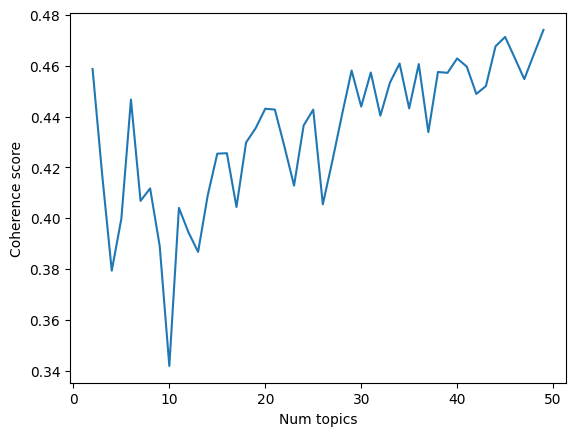

In [16]:
#printing the coherence score to visualize the optimal num of topics
limit=50; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num topics")
plt.ylabel("Coherence score")
plt.show()

In [17]:
#printing the coherence score to find the optimal num of topics
for m, cv, in zip(x, coherence_values):
    print("Num topics = ", m, "has Coherence value of", round(cv, 4))

Num topics =  2 has Coherence value of 0.4587
Num topics =  3 has Coherence value of 0.4172
Num topics =  4 has Coherence value of 0.3794
Num topics =  5 has Coherence value of 0.3998
Num topics =  6 has Coherence value of 0.4467
Num topics =  7 has Coherence value of 0.4069
Num topics =  8 has Coherence value of 0.4117
Num topics =  9 has Coherence value of 0.389
Num topics =  10 has Coherence value of 0.3419
Num topics =  11 has Coherence value of 0.4041
Num topics =  12 has Coherence value of 0.3944
Num topics =  13 has Coherence value of 0.3868
Num topics =  14 has Coherence value of 0.409
Num topics =  15 has Coherence value of 0.4254
Num topics =  16 has Coherence value of 0.4256
Num topics =  17 has Coherence value of 0.4045
Num topics =  18 has Coherence value of 0.4298
Num topics =  19 has Coherence value of 0.4354
Num topics =  20 has Coherence value of 0.4431
Num topics =  21 has Coherence value of 0.4427
Num topics =  22 has Coherence value of 0.4282
Num topics =  23 has Co

In [18]:
optimal_model = model_list[0]
model_topics = optimal_model.show_topics(formatted=False)
optimal_model.print_topics(num_words=10)

[(0,
  '0.028*"eur" + 0.019*"mn" + 0.014*"profit" + 0.012*"sale" + 0.011*"net" + 0.011*"company" + 0.010*"operating" + 0.010*"million" + 0.009*"finnish" + 0.009*"said"'),
 (1,
  '0.014*"company" + 0.007*"finland" + 0.006*"share" + 0.006*"finnish" + 0.006*"said" + 0.005*"service" + 0.005*"eur" + 0.004*"market" + 0.004*"group" + 0.004*"business"')]

In [19]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(optimal_model, doc_term_matrix, dictionary)
vis

PreparedData(topic_coordinates=              x    y  topics  cluster       Freq
topic                                           
1      0.071671  0.0       1        1  53.919697
0     -0.071671  0.0       2        1  46.080303, topic_info=          Term         Freq        Total Category  logprob  loglift
105        eur  1001.000000  1001.000000  Default  30.0000  30.0000
107         mn   616.000000   616.000000  Default  29.0000  29.0000
66         net   337.000000   337.000000  Default  28.0000  28.0000
68      profit   449.000000   449.000000  Default  27.0000  27.0000
70        sale   405.000000   405.000000  Default  26.0000  26.0000
..         ...          ...          ...      ...      ...      ...
205       2006    98.813512   138.045932   Topic2  -5.6981   0.4404
166        oyj   131.558746   216.465748   Topic2  -5.4119   0.2768
147      share   164.192893   375.498170   Topic2  -5.1903  -0.0524
141      group   118.444991   259.775044   Topic2  -5.5169  -0.0106
447  decreased   103.967420   188.114976   Topic2  -5.6473   0.1818

[179 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
1078      1  0.047592  12month
1078      2  0.951841  12month
5417      1  0.954644    20000
205       1  0.282515     2006
205       2  0.717153     2006
...     ...       ...      ...
5659      2  0.068897  website
1650      1  0.931765  without
1650      2  0.040512  without
74        1  0.239872     year
74        2  0.758998     year

[271 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1])

In [20]:
optimal_model = model_list[44]
model_topics = optimal_model.show_topics(formatted=False)
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(optimal_model, doc_term_matrix, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
5     -0.317521  0.064266       1        1  5.820035
41    -0.194494 -0.122378       2        1  4.687846
25    -0.083988 -0.159947       3        1  4.471670
22     0.014595 -0.021413       4        1  2.961757
38     0.003020 -0.048663       5        1  2.517793
31     0.005070 -0.051445       6        1  2.482913
6     -0.041675 -0.080701       7        1  2.442996
23    -0.229185  0.050944       8        1  2.418212
15    -0.048565  0.012664       9        1  2.415739
1     -0.007063  0.000349      10        1  2.391176
27     0.060415 -0.032549      11        1  2.363302
45     0.066182 -0.026456      12        1  2.341561
3      0.123488  0.022717      13        1  2.315338
34     0.024019 -0.032718      14        1  2.311499
44    -0.047312 -0.022296      15        1  2.300890
4     -0.106834 -0.042022      16        1  2.271091
24     0.045423 -0.031080      17        1  2.260241
10    -0.094225 -0.067958      18        1  2.248247
39     0.006154 -0.144385      19        1  2.134070
40     0.045907  0.053559      20        1  2.112805
29     0.037957  0.007322      21        1  2.059855
14     0.052071 -0.087597      22        1  2.033911
28    -0.168902  0.063383      23        1  2.015831
18     0.093045  0.027657      24        1  1.983736
19     0.075072 -0.001542      25        1  1.974932
42     0.103752 -0.019238      26        1  1.952647
12     0.023129  0.066278      27        1  1.895310
21     0.076483  0.065901      28        1  1.876454
32     0.043828 -0.018760      29        1  1.790250
9     -0.051561  0.009231      30        1  1.767380
37     0.082897 -0.011436      31        1  1.761860
17     0.055252 -0.023896      32        1  1.759883
8      0.124533  0.018265      33        1  1.757177
43     0.057206 -0.056187      34        1  1.753279
2      0.041138  0.039365      35        1  1.733352
35     0.028345  0.054978      36        1  1.726925
13    -0.131304  0.115786      37        1  1.675980
11     0.065183  0.027531      38        1  1.615385
33     0.039196  0.005228      39        1  1.588220
30     0.070787  0.077872      40        1  1.579216
0      0.071297  0.069856      41        1  1.573894
20     0.067778  0.016434      42        1  1.557555
26    -0.010932 -0.047147      43        1  1.473934
7     -0.071399  0.105518      44        1  1.433051
16    -0.018102  0.083179      45        1  1.367975
36     0.019838  0.091532      46        1  1.022826, topic_info=            Term         Freq        Total Category  logprob  loglift
107           mn   699.000000   699.000000  Default  30.0000  30.0000
105          eur  1158.000000  1158.000000  Default  29.0000  29.0000
483          mln   293.000000   293.000000  Default  28.0000  28.0000
447    decreased   188.000000   188.000000  Default  27.0000  27.0000
699         fell   142.000000   142.000000  Default  26.0000  26.0000
..           ...          ...          ...      ...      ...      ...
105          eur     9.494900  1158.776650  Topic46  -4.2328  -0.2218
70          sale     6.355666   525.543239  Topic46  -4.6342   0.1675
107           mn     5.359832   699.109836  Topic46  -4.8046  -0.2883
990  information     3.878859    58.552022  Topic46  -5.1280   1.8682
343     solution     3.748750   134.516289  Topic46  -5.1621   1.0023

[2608 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
1092      2  0.615338         0
1092     15  0.153834         0
1092     23  0.076917         0
824       2  0.143383       000
824       6  0.430150       000
...     ...       ...       ...
975      26  0.089505       yit
3871     18  0.852940      york
4333      3  0.167496         
4333     25  0.669986         
4881     20  0.913046  ænekoski

[8369 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 42, 26, 23,

In [21]:
optimal_model = model_list[42]
model_topics = optimal_model.show_topics(formatted=False)
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(optimal_model, doc_term_matrix, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
16     0.335242  0.077278       1        1  8.335259
24    -0.033577 -0.078696       2        1  3.859890
7      0.103682 -0.090638       3        1  3.461112
6     -0.026991 -0.065013       4        1  3.349270
30     0.133516 -0.081166       5        1  3.123117
33     0.033669 -0.079525       6        1  3.108648
39    -0.060553  0.021076       7        1  2.525418
35     0.130338 -0.102167       8        1  2.465120
12    -0.094791  0.019651       9        1  2.415660
18     0.095637 -0.007222      10        1  2.382980
28     0.115825  0.060366      11        1  2.344626
15     0.027116  0.030167      12        1  2.294478
36     0.063339 -0.001106      13        1  2.288457
29    -0.042540  0.028272      14        1  2.286837
26     0.081351 -0.056423      15        1  2.268348
4     -0.086340 -0.035618      16        1  2.223609
10     0.029427 -0.080833      17        1  2.152822
42    -0.001004 -0.068714      18        1  2.086000
5     -0.014282 -0.079077      19        1  2.062818
17    -0.085227 -0.063158      20        1  2.015545
2     -0.000822 -0.032787      21        1  1.998073
40    -0.118643 -0.009328      22        1  1.985346
14     0.008987  0.019962      23        1  1.975973
20     0.047592  0.078341      24        1  1.951482
34    -0.042957 -0.038060      25        1  1.914961
27    -0.091749  0.037249      26        1  1.897326
11     0.025660 -0.109692      27        1  1.875730
32    -0.065579  0.035334      28        1  1.873756
9     -0.059526 -0.011464      29        1  1.857534
8     -0.000914  0.041582      30        1  1.845120
21    -0.050547 -0.002017      31        1  1.841631
38    -0.091299  0.035694      32        1  1.811857
3      0.063170  0.038663      33        1  1.785024
41     0.000276  0.071444      34        1  1.784389
19    -0.082783 -0.054812      35        1  1.769974
37    -0.090464  0.023273      36        1  1.767921
25     0.005107  0.047815      37        1  1.715230
13     0.144659  0.075187      38        1  1.708944
23    -0.133233  0.113635      39        1  1.694615
43    -0.090055  0.023645      40        1  1.693050
1      0.121182  0.133181      41        1  1.681746
0     -0.025932  0.037860      42        1  1.601686
31    -0.096257  0.071888      43        1  1.492129
22    -0.079712  0.025951      44        1  1.426486, topic_info=           Term         Freq        Total Category  logprob  loglift
107          mn   659.000000   659.000000  Default  30.0000  30.0000
105         eur  1092.000000  1092.000000  Default  29.0000  29.0000
483         mln   318.000000   318.000000  Default  28.0000  28.0000
447   decreased   164.000000   164.000000  Default  27.0000  27.0000
68       profit   511.000000   511.000000  Default  26.0000  26.0000
...         ...          ...          ...      ...      ...      ...
31     employee     5.626009    83.188468  Topic44  -5.0888   1.5562
159     finland     6.348694   322.459261  Topic44  -4.9679   0.3222
2028       term     5.217302    61.123436  Topic44  -5.1642   1.7890
2001   includes     5.135413    50.752909  Topic44  -5.1800   1.9591
483         mln     5.479253   318.810870  Topic44  -5.1152   0.1863

[2551 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
1092      2  0.079940         0
1092     23  0.079940         0
1092     31  0.079940         0
1092     41  0.559578         0
824       1  0.194382       000
...     ...       ...       ...
975      40  0.209028       yit
3871     26  0.878475      york
4333      9  0.160406         
4333     21  0.641625         
4881     12  0.763836  ænekoski

[8177 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[17, 25, 8, 7, 31, 34, 40, 36, 13, 19, 29, 16, 37, 30, 27, 5, 11, 43, 6, 18, 3, 41, 15, 21, 35, 28, 12, 33, 10, 9, 22, 39, 4, 42, 20,

## Analysis of mutual similarity

In [22]:
vectorizer = TfidfVectorizer()
documents_str = [' '.join(doc) for doc in df['text']]
tfidf_matrix = vectorizer.fit_transform(documents_str)
similarity_matrix = cosine_similarity(tfidf_matrix)
similarity_matrix

array([[1.        , 0.08644315, 0.05267148, ..., 0.        , 0.        ,
        0.        ],
       [0.08644315, 1.        , 0.01859354, ..., 0.        , 0.        ,
        0.        ],
       [0.05267148, 0.01859354, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.39096169,
        0.04805191],
       [0.        , 0.        , 0.        , ..., 0.39096169, 1.        ,
        0.07848533],
       [0.        , 0.        , 0.        , ..., 0.04805191, 0.07848533,
        1.        ]])

Documents 43 and 57 have similarity >= 0.9
Documents 78 and 79 have similarity >= 0.9
Documents 264 and 277 have similarity >= 0.9
Documents 471 and 494 have similarity >= 0.9
Documents 627 and 629 have similarity >= 0.9
Documents 788 and 789 have similarity >= 0.9
Documents 866 and 2162 have similarity >= 0.9
Documents 1023 and 1116 have similarity >= 0.9
Documents 1030 and 1190 have similarity >= 0.9
Documents 1098 and 1099 have similarity >= 0.9
Documents 1166 and 1167 have similarity >= 0.9
Documents 1182 and 1307 have similarity >= 0.9
Documents 1224 and 1488 have similarity >= 0.9
Documents 1231 and 1232 have similarity >= 0.9
Documents 1360 and 1361 have similarity >= 0.9
Documents 1375 and 1376 have similarity >= 0.9
Documents 1393 and 1394 have similarity >= 0.9
Documents 1415 and 1416 have similarity >= 0.9
Documents 1443 and 1675 have similarity >= 0.9
Documents 1646 and 2854 have similarity >= 0.9
Documents 1765 and 1790 have similarity >= 0.9
Documents 2079 and 2213 have s

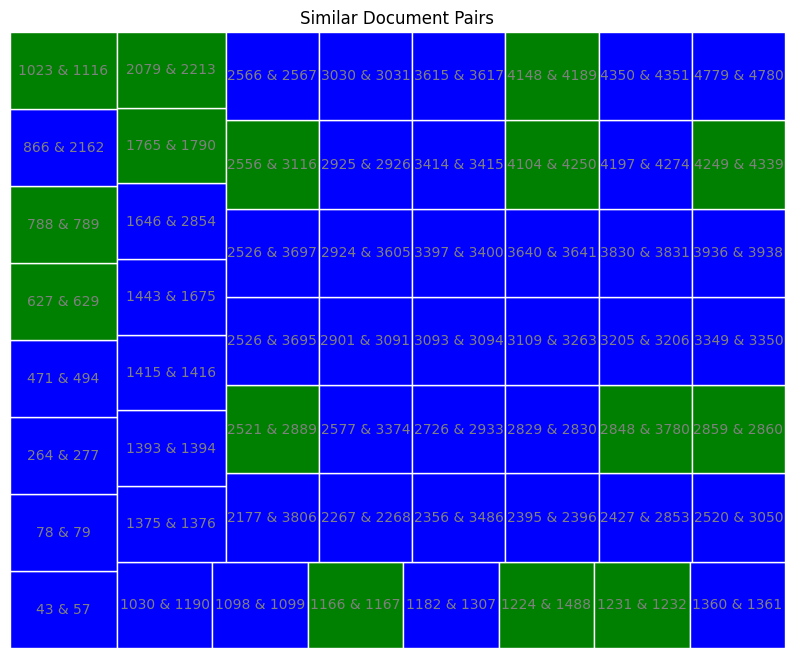

58

In [23]:
threshold = 0.9

similar_pairs = []

num_documents = similarity_matrix.shape[0]

for i in range(num_documents):
    for j in range(i + 1, num_documents):
        if similarity_matrix[i, j] >= threshold:
            similar_pairs.append((i, j))


# Print the similar pairs
for pair in similar_pairs:
    doc1 = pair[0]
    doc2 = pair[1]
    print(f"Documents {doc1} and {doc2} have similarity >= {threshold}")

threshold_colors = {
    0.9: 'blue',
    1.0: 'green'
}
colors = []
for pair in similar_pairs:
    if similarity_matrix[pair[0], pair[1]] == 1.0:
        colors.append(threshold_colors[1.0])
    elif 0.9 <=similarity_matrix[pair[0], pair[1]] < 1.0 :
        colors.append(threshold_colors[0.9])


sizes = [1] * len(similar_pairs)
labels = [f'{pair[0]} & {pair[1]}' for pair in similar_pairs]



plt.figure(figsize=(10, 8))
squarify.plot(sizes=sizes, label=labels, color=colors, edgecolor='white', text_kwargs={'color':'grey'})


plt.title("Similar Document Pairs")
plt.axis("off")
plt.show()

len(similar_pairs)



## Collocation analysis

In [24]:
words = []
for words_corpus in documents_str:
    if isinstance(words_corpus, list):
        for corpus in words_corpus:
            matches = re.findall(r'\w+', corpus)
            words.extend(matches)
    else:
        matches = re.findall(r'\w+', words_corpus)
        words.extend(matches)
documents_str = [re.sub(r'\d+', '', text) for text in documents_str]
nltk.Text(words).collocations(20)
#top 20 bigrams
bigrams = list(nltk.ngrams(nltk.Text(words), 2))

net sale; operating profit; corresponding period; mln euro; oyj hel;
omx helsinki; stora enso; said today; third quarter; per share; net
profit; stock exchange; first quarter; real estate; second quarter;
year earlier; alma medium; nine month; board director; adp news


In [25]:
print(len(words))
print(len(bigrams))


63967
63966


In [26]:
documents_str # preprocessed data for collocation and clustering analysis

['according gran company plan move production russia although company growing',
 'technopolis plan develop stage area le  square meter order host company working computer technology telecommunication statement said',
 'international electronic industry company elcoteq laid ten employee tallinn facility contrary earlier layoff company contracted rank office worker daily postimees reported',
 'new production plant company would increase capacity meet expected increase demand would improve use raw material therefore increase production profitability',
 'according company updated strategy year  basware target longterm net sale growth range   operating profit margin   net sale',
 'financing aspocomp growth aspocomp aggressively pursuing growth strategy increasingly focusing technologically demanding hdi printed circuit board pcbs',
 'last quarter  componenta net sale doubled eurm eurm period year earlier moved zero pretax profit pretax loss eurm',
 'third quarter  net sale increased  eur  m

In [27]:
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(documents_str)


feature_names = vectorizer.get_feature_names_out()

colloc = defaultdict(float)
for i, doc in enumerate(documents_str):
    feature_index = tfidf_matrix[i, :].nonzero()[1]
    tfidf_scores = zip(feature_index, [tfidf_matrix[i, x] for x in feature_index])

    for term_idx, score in tfidf_scores:
        term = feature_names[term_idx]
        colloc[term] = max(colloc[term], score)


sorted_collocations = sorted(colloc.items(), key=lambda x: x[1], reverse=True)

# Print the top  20 collocations
top_collocations = sorted_collocations[:20]
for collocation in top_collocations:
    print(collocation)


('forecast', 1.0)
('alone', 1.0)
('could', 1.0)
('welcome', 1.0)
('think', 1.0)
('thousand', 0.9007865546564954)
('gearing', 0.8906513436532357)
('capman', 0.8824613712544839)
('sekm', 0.8822750380611936)
('layoff', 0.8551528546185981)
('xa', 0.8540616406543488)
('catalyst', 0.8492098122051356)
('aspo', 0.8426974649984073)
('reserved', 0.8362268497484426)
('kemira', 0.8283433549616038)
('nwc', 0.8208188924095403)
('mln', 0.8160874489708007)
('nd', 0.8143222844294745)
('know', 0.8101744580566537)
('billion', 0.8061246849117512)


## Clustering

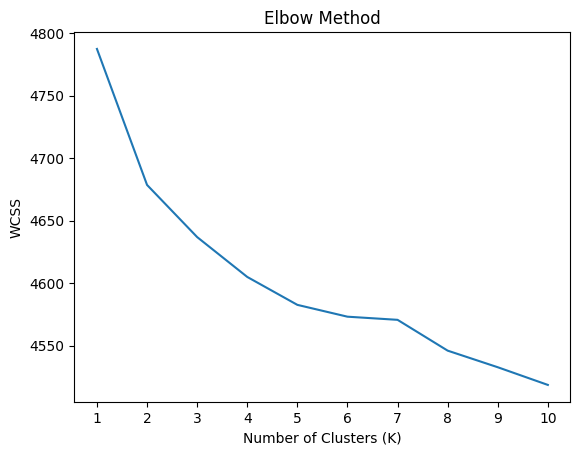

In [28]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(tfidf_matrix)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.xticks(range(1,11))
plt.show()
# 7 - optimal number of clusters

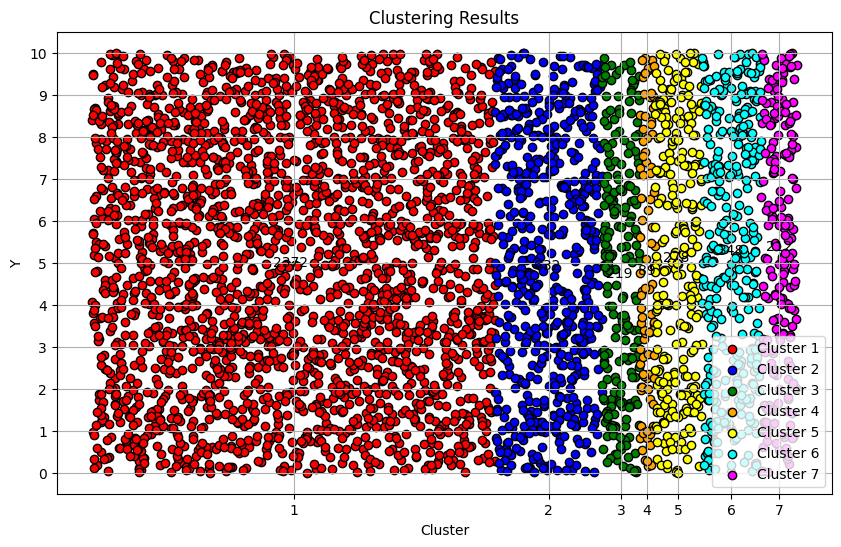


Cluster 1:
Number of documents: 2372
Document:
financing aspocomp growth aspocomp aggressively pursuing growth strategy increasingly focusing technologically demanding hdi printed circuit board pcbs

Cluster 2:
Number of documents: 632
Document:
according gran company plan move production russia although company growing

Cluster 3:
Number of documents: 219
Document:
according company updated strategy year  basware target longterm net sale growth range   operating profit margin   net sale

Cluster 4:
Number of documents: 89
Document:
company order book stood  bln euro  bln september    pct year international order amounting  mln euro  mln

Cluster 5:
Number of documents: 278
Document:
third quarter  net sale increased  eur  mn operating profit  eur  mn

Cluster 6:
Number of documents: 348
Document:
brazilian unit finnish security solution provider fsecure signed  new client last year online news source reseller web quoted division commercial director vladimir brando saying

Cluster 7:


In [29]:

labels = kmeans.labels_

# Visualize the clustering results
colors = ['red', 'blue', 'green', 'orange', 'yellow', 'cyan', 'magenta']
plt.figure(figsize=(10, 6))


cluster_sizes = [len([documents_str[j] for j, label in enumerate(labels) if label == i]) for i in range(7)]


total_width = sum(cluster_sizes)


cluster_widths = [size / total_width * 10 for size in cluster_sizes]


x_coordinates = np.cumsum([0] + cluster_widths[:-1])

for i in range(7):
    cluster_docs = [documents_str[j] for j, label in enumerate(labels) if label == i]
    cluster_size = len(cluster_docs)
    x = np.random.uniform(x_coordinates[i], x_coordinates[i] + cluster_widths[i], size=cluster_size)
    y = np.random.uniform(0, 10, size=cluster_size)
    plt.scatter(x, y, c=colors[i], label=f"Cluster {i+1}", edgecolors='black')
    plt.text(x.mean(), y.mean(), f"{cluster_size}", color='black', ha='center', va='center')

plt.legend()
plt.title("Clustering Results")
plt.xticks(x_coordinates + np.array(cluster_widths) / 2, [f"{i+1}" for i in range(7)])
plt.yticks(range(11))
plt.xlabel("Cluster")
plt.ylabel("Y")
plt.grid(True)
plt.show()

# Describe important clusters
for i in range(7):
    cluster_docs = [documents_str[j] for j, label in enumerate(labels) if label == i]
    cluster_size = len(cluster_docs)
    print(f"\nCluster {i+1}:")
    print(f"Number of documents: {cluster_size}")
    print("Document:")
    if cluster_size > 0:
        print(cluster_docs[0])